### Tuning Supervised Learners

#### Measures of Performance
##### Confusion matrix
Visualises the performance of a classification algorithm. Rows represent the items belonging to the actual classes, column represents the items belonging to the predicted classes.

Samples are categorised by being True/False Negatives/Positives (TN, FN, TP, FP). False positives are usually called a type 1 error, false negatives a type 2 error. There's usually a trade-off between the two, and which error you should be more concerned aout depends on the problem you're trying to solve.

##### Recall
A measure that indicates the ratio of positive test data items that are correctly identified out of all the items that are actually positive. Can be computed from the confusion matrix as $$Recall = \frac{TP}{TP + FN}$$

##### Precision
Measure that indicates ratio of the number of correctly predicted positive points to the number of all the points that were predicted as positive. $$Precision = \frac{TP}{TP + FP}$$

##### F-Measure
Take harmonic mean of precision and recall to give a general picture of the goodness of the classification model. Harmonic mean penalises the exteme values more and moves more toward the lower value of the two: $$F-Measure = \frac{2*Precision*Recall}{Precision+Recall}$$

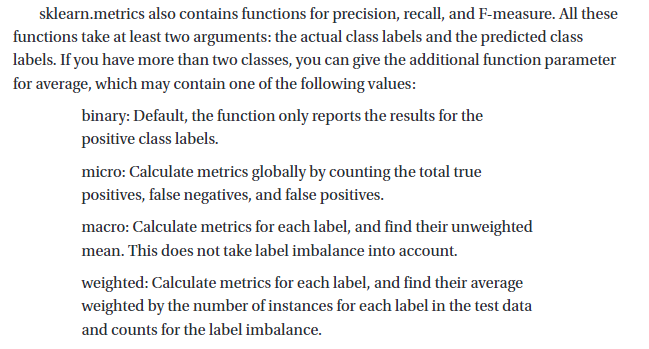


In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

iris = datasets.load_iris()
iris_data = pd.DataFrame(iris['data'], columns = iris['feature_names'])
iris_data['target'] = iris['target']
iris_data['target'] = iris_data['target'].apply(lambda x: iris['target_names'][x])
iris_data.shape

X = iris_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = iris_data['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

DT_model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth=3)

DT_model_gini.fit(X_train, y_train)

y_pred = DT_model_gini.predict(X_test)
print(y_pred)

import sklearn.metrics

sklearn.metrics.confusion_matrix(y_test, y_pred)

p = sklearn.metrics.precision_score(y_test, y_pred, average='micro')
r = sklearn.metrics.recall_score(y_test, y_pred, average='micro')
f = sklearn.metrics.f1_score(y_test, y_pred, average='micro')
a = sklearn.metrics.accuracy_score(y_test, y_pred)

print("Here are the metrics for the trained model:")
print("Precision:\t{}\nRecall:\t{}\nF-score:\t{}\nAccuracy:\t{}".format(p,r,f,a))


['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa']
Here are the metrics for the trained model:
Precision:	0.9666666666666667
Recall:	0.9666666666666667
F-score:	0.9666666666666667
Accuracy:	0.9666666666666667


In [2]:
print(sklearn.metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



#### Cross Validation
We saw in the previous section that while approaching a supervised learning problem, we divide the labelled dataset into two components - the training set and validation set. Rather than relying on a static part of the data for training the model and using the other static part for validation, it is a good idea to come with a rotation of training and testing parts to be able to determine how well the model will generalise to an independent dataset.

We have a predefined ratio of test dataset, say 25%. In the first iteration, we consider the first part of the labelled data as test data and the remaining as training data. We then attain a set of metrics. We do the same for the 2nd fold. We repeat the process k times, where k is the number of folds that were thus created. This is called k-fold cross-validation.

Over k iterations, we will obtain k metrics, which can be averaged to find a more generalisable metric that can be used to tune the hyperparameters.

We cross-validate as if we tweak a model based on a static test set, it is possible to overoptimise and overfit on the test set which may not generalise to more unseen data.

In [3]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
X = pd.DataFrame(iris['data'], columns = iris['feature_names'])
y=iris['target']

#fivefold cross validation to create multiple splits:

from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(X)

# look at index of the elements that are chosen for training and testing in each iteration:

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print("Iteration" +str(i+1))
    print("Train Indices:", train_index, "\nTest Indices:", test_index, "\n")


Iteration1
Train Indices: [ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] 
Test Indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29] 

Iteration2
Train Indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 1

In [4]:
score_history = []
for train, test in kf.split(X, y):
    clf = DecisionTreeClassifier()
    clf.fit(X.values[train,:], y[train])
    score_history.append(clf.score(X.values[test,:], y_pred))

#Alternatively, can import cross_val_score.

##### ROC Curve
Various classification algorithms can be configured to produce a class label based on a predefined threshold on the probability of the data item belonging to a class. The classifier's predictions can strongly differ based on the threshold. This indirectly affects the precision and recall, sensitivity and specificity. Sensitivity, or recall, is the ratio of true positives and total positive data items. Specificity is the ratio of true negatives and all the data items that are actually negatives. Usually there is a tradeoff between the two.

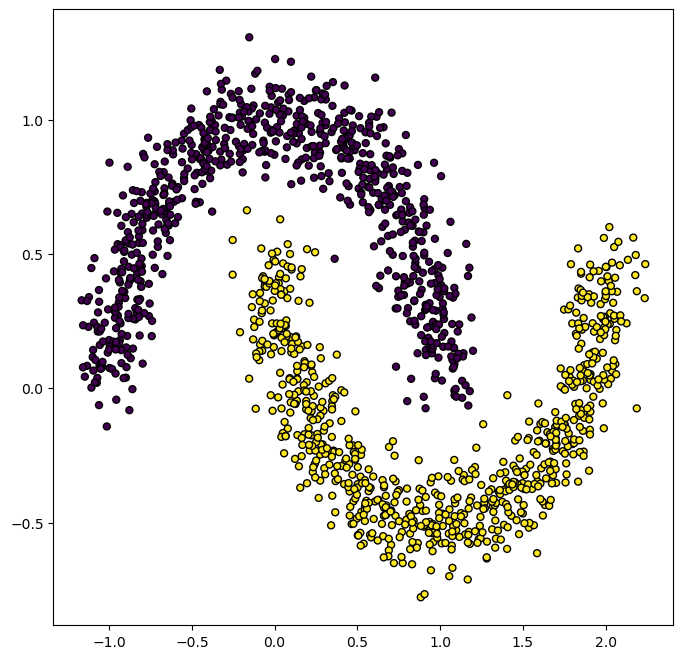

In [5]:
#Generating a complex dataset

from sklearn.datasets import make_moons
X1, Y1 = make_moons(n_samples = 1500, shuffle=True, noise=0.1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(X1[:,0], X1[:,1], marker='o', c=Y1, s=25, edgecolor='k')
plt.show()

In [6]:
#Generating a less complex dataset
"""
from sklearn.datasets import make_classification
x1, y1 = make_classification(n_classes=2, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class= 1)

plt.figure(figsize=(8,8))
plt.scatter(x1[:,0], x1[:,1], marker='o', c=y1, s=25, edgecolor='k')
plt.show()
"""

"\nfrom sklearn.datasets import make_classification\nx1, y1 = make_classification(n_classes=2, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class= 1)\n\nplt.figure(figsize=(8,8))\nplt.scatter(x1[:,0], x1[:,1], marker='o', c=y1, s=25, edgecolor='k')\nplt.show()\n"

In [7]:
#train a logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state =3)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [8]:
#call the predict_proba() method - produces each point belonging to the second class
logreg.predict_proba(X_test)

# gives an array of shape (20,2) - 20 test samples, the probability of each class is given in the two columns.
#ROC curve plots true positive rate vs false positive rate.

y_pred_proba = logreg.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

from sklearn.metrics import auc
auc(fpr,tpr)

0.9604137745734628

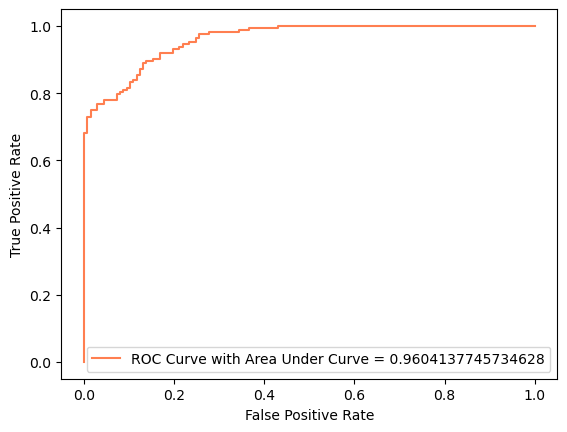

In [9]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label ='ROC Curve with Area Under Curve = '+str(auc(fpr,tpr)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

(-1.7778986411185125, 2.302101358881491)

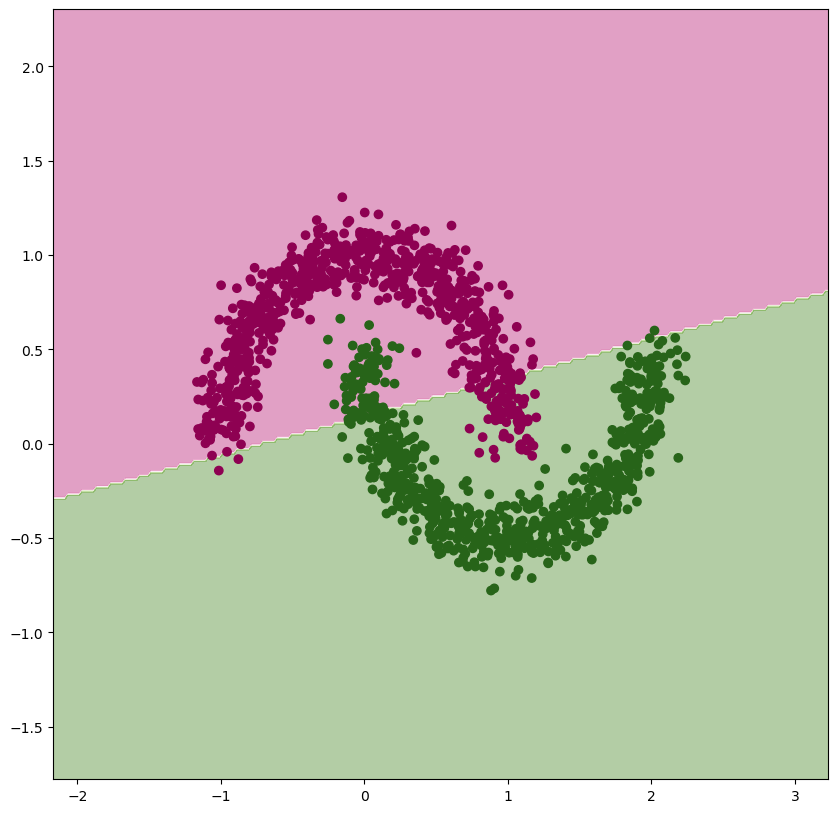

In [10]:
x_min, x_max = X1[:,0].min()-1, X1[:,0].max()+1
y_min, y_max = X1[:,1].min()-1, X1[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.rcParams['figure.figsize'] = (10,10)
plt.figure()
plt.contourf(xx,yy, Z, alpha=0.4, cmap='PiYG')

plt.scatter(X1[:,0], X1[:,1], c=Y1, cmap='PiYG')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

#### Overfitting and Regularisation
In polynomial regression, we are still using the linear regression methodologies to fit a line. However, this is done after expanding the independent variables into polynomial features.

(100, 1)


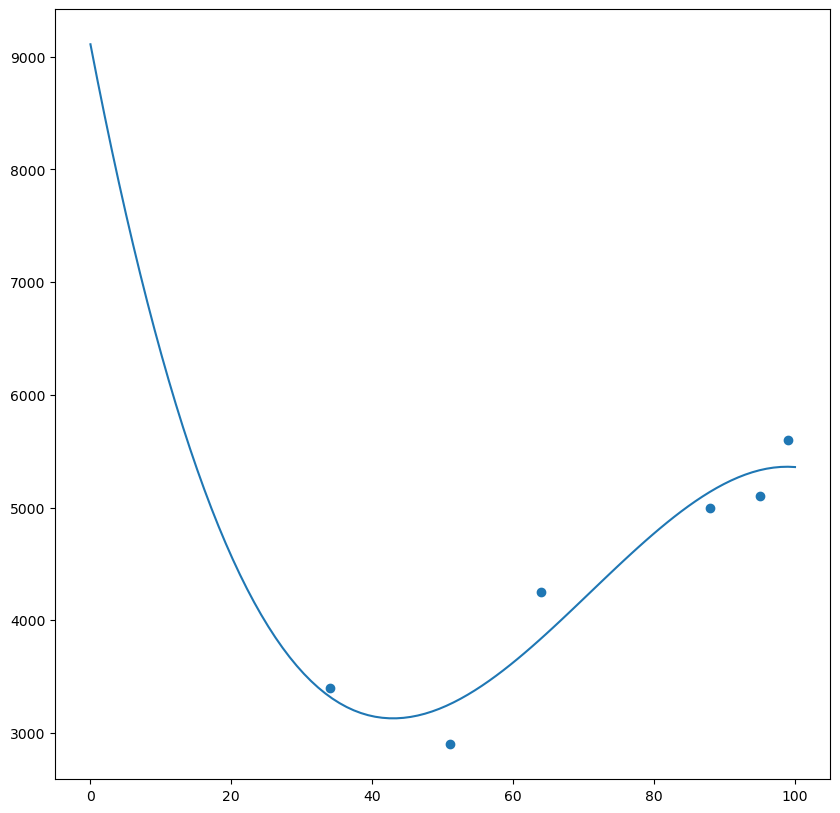

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
data = pd.DataFrame({"marks":[34,51,64,88,95,99], "salary":[3400,2900,4250,5000,5100,5600]})
X = data[['marks']].values
y=data['salary'].values
poly = PolynomialFeatures(3)
X2 = poly.fit_transform(X)
#New array X1 of shape (6,4) which are created from x^0, X^1,X^2, X^3

reg = LinearRegression()
reg.fit(X2, y)
X_seq = np.linspace(0,100, 100).reshape(-1,1)
print(X_seq.shape)
y_constant = np.array([(4500) for i in range(100)])
X_seq_1 = poly.fit_transform(X_seq)
y_seq = reg.predict(X_seq_1)

plt.figure()
plt.scatter(X,y)
plt.plot(X_seq, y_seq)
plt.show()

#Shows the overfitting of the model.
#We made the model more complex to fit the data too well.

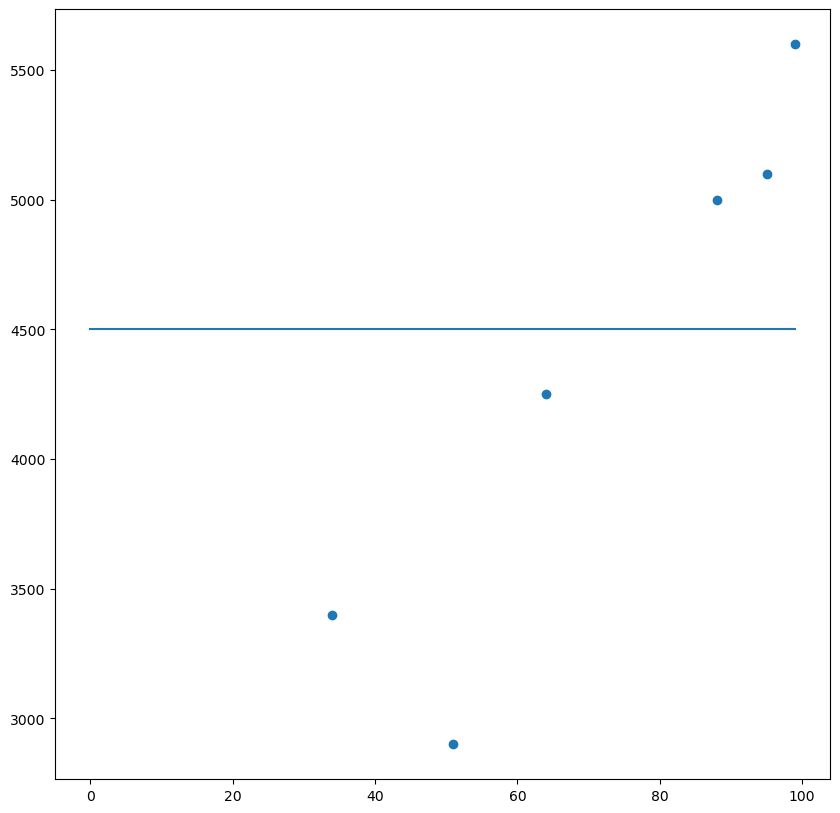

In [12]:
#Opposite is underfitting:
plt.figure()
plt.scatter(X,y)
plt.plot(y_constant)
plt.show()

#### Bias and Variance
Properties of a model that arise due to either oversimplicity or overcomplexity of our model. Bias represents how far a model's predictions are compared to the actual values. High bias means the model is overly simple, and the assumptions it has learned are too basic.

Variance represents how sensitive the model is to fluctuations in the data. When the variance is high, the model will capture all the features of the dataset, including the noise and randomness. Thus, it becomes overly tuned. However, when it encounters unseen data, it might yield unexpectedly poor results. Such a model yields a low training error; however the error is quite high while testing. 

We need to find a balance between bias and variance in order to come up with a model that is sensitive to patterns in our data while also being able to generalise to new unseen data.

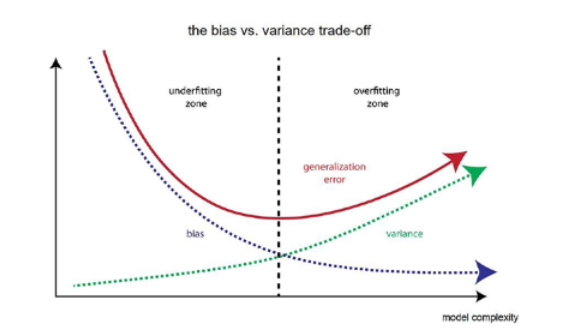


##### Regularization

A way is to manipulate the cost function that penalises overcomplexity in the model in order to find the right parameters instead of explicitly limiting the numbers of parameters to learn. Thus, say, the cost function of an algorithm is given by J(w), where w represents the weights of the parameters; the new cost function is given by $$J(w) = J_D(w) + \lambda J(w)$$ where the first part is sum of squared residuals, the additional part is $\lambda$ times sum of all the weights. $\lambda$ is a hyperparameter that is used to control how much regularisation strength we want to apply.

##### L1 and L2 Regularisation
This is a technique that discourages learning a more complex or flexible model, so as to avoid the risk of overfitting by manipulating the cost function to avoid learning weights that are two high. L2 regularisation is a poly-time closed-form solution that penalises the model based on the summation of squares of model weights.

In ridge regression, L2 penalty is applied, which modifies the cost function to 
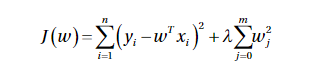 

Coefficient estimates produced by this method known as the L2 norm.

Lasso Regression, L1 penalty is applied, uses absolute value of the weights (instead of the squares). The cost function thus becomes 

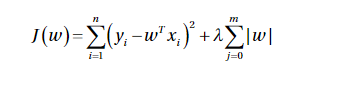



c:\Users\adam\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.820e+05, tolerance: 5.559e+02
  model = cd_fast.enet_coordinate_descent(


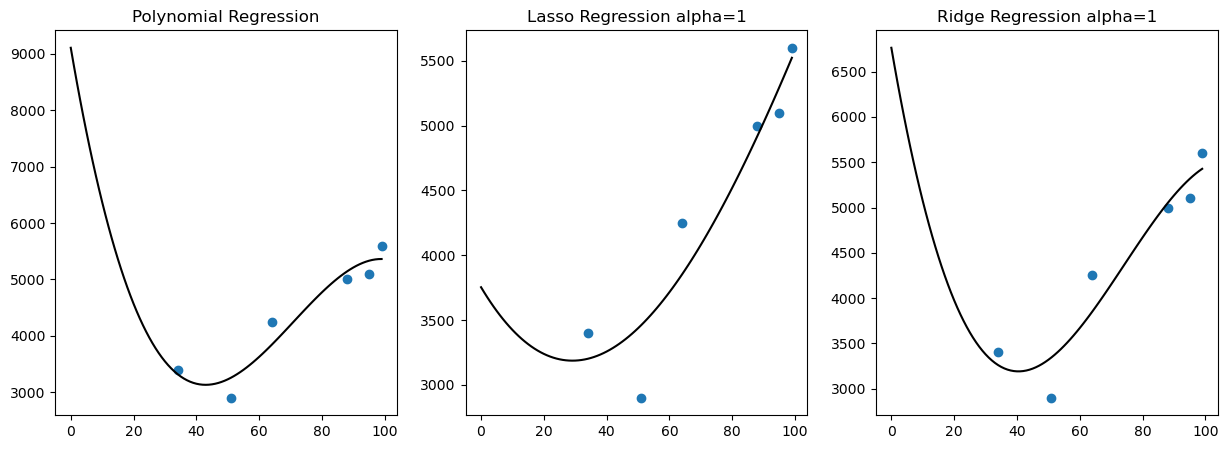

In [13]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

data = pd.DataFrame({"marks":[34,51,64,88,95,99],"salary":[3400,2900,4250,5000,5100,5600]})
X = data[['marks']].values
y = data['salary'].values

fig, axs = plt.subplots(1,3, figsize=(15,5))
methods = ['Polynomial Regression', 'Lasso Regression alpha=1', 'Ridge Regression alpha=1']

for i in [0,1,2]:
    poly = PolynomialFeatures(3)
    X1 = poly.fit_transform(X)
    if i==0:
        reg = LinearRegression()
        reg.fit(X1, y)
    if i==1:
        reg = Lasso(alpha=1)
        reg.fit(X1, y)
    if i==2:
        reg = Ridge(alpha=1)
        reg.fit(X1,y)

    X_seq = np.linspace(0, X.max(), 100).reshape(-1,1)
    X_seq_1 = poly.fit_transform(X_seq)
    y_seq = reg.predict(X_seq_1)

    axs[i].scatter(X,y)
    axs[i].plot(X_seq, y_seq, color='black')
    axs[i].set_title(methods[i])

plt.show()

#Regularisation reduces the variance in the models significantly without substantial increase in bias.

##### Hyperparameter Tuning
While approaching an ML problem, you have to engineer and select the right features, pick the algorithm and tune the selected algorithm for the hyperparameters they are affected by.

Parameters are the weights a model learns during the learning phase. Hyperparameters are the externally controlled elements that affect how and what the model learns.

Examples of hyperparameters: "K" in K-nearest neighbours, regularisation strength in Ridge/Lasso Regreession, Max depth of a decision tree, Learning rate for gradient descent.

c:\Users\adam\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\adam\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

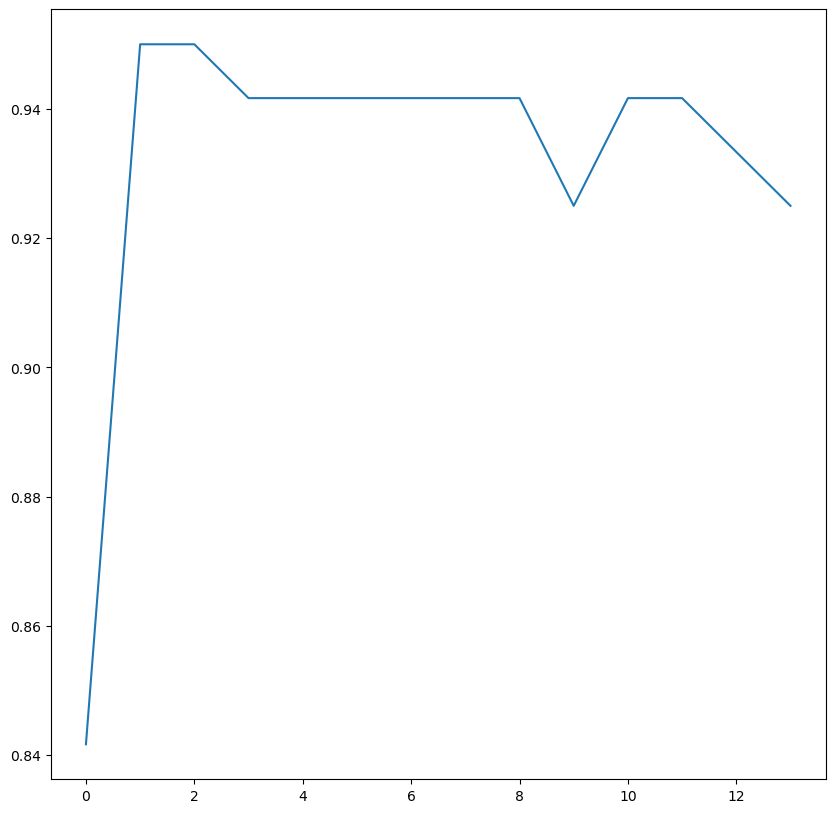

In [14]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
X, y = make_classification(n_samples=400, n_features=2, n_informative=2, n_redundant=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

accuracy_history = []
for i in range(1,15):
    poly = PolynomialFeatures(i)
    X1 = poly.fit_transform(X_train)
    reg = LogisticRegression(max_iter=100)
    reg.fit(X1, y_train)
    X1_test = poly.transform(X_test)
    y_pred = reg.predict(X1_test)
    accuracy_history.append(accuracy_score(y_test, y_pred))

plt.plot(accuracy_history)

Case of multiple hyperparameters, have to evaluate the model for multiple possible values for each hyperparameter. For decision trees: criterion, max_depth, min_samples_split, min_samples_leaf. This gives many decision trees to look through, one of which will give the best metrics. SK-Learn provides ready to use implementations to exhaust all the possibilities (grid search), and to test random possibilities (random search).

##### Grid Search
Process of searching through a specified subset of hyperparameter spaces exhaustively. Example with DecisiontreeClassifier:

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_grid = {"criterion":["gini", "entropy"],
              "max_depth":[None, 5, 10, 15],
              "min_samples_split":[4,8,16],
              "min_samples_leaf":[1,2,4]}

base_estimator = DecisionTreeClassifier()
grid_search_cv = GridSearchCV(base_estimator, param_grid, verbose=1, cv=3)

#Another synthetic dataset

dataset = make_moons(n_samples=10000, shuffle=True, noise=0.4)
X_train, X_test, y_train, y_test = train_test_split(dataset[0],dataset[1],test_size=0.2,random_state=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [4, 8, 16]},
             verbose=1)

In [16]:
from sklearn.metrics import classification_report


grid_search_cv.cv_results_.keys()
grid_search_cv.best_estimator_
best_estimator = DecisionTreeClassifier(max_depth=5,min_samples_leaf=4, min_samples_split=16)
best_estimator.fit(X_train, y_train)
y_pred = best_estimator.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.83      0.85       982
           1       0.84      0.87      0.86      1018

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



Rather than search exhaustively, random search selects random possibilities and selects the best model accordingly. We can provide a distribution instead of discrete values to define a search space.

In [17]:
from scipy.stats import randint
param_grid = {"criterion":["gini","entropy"],
              "max_depth":randint(1,20),
              "min_samples_split":[1,2,4]}

random_search_cv = RandomizedSearchCV(estimator = base_estimator, param_distributions = param_grid, n_iter = 100, cv=5, verbose=2)
random_search_cv.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ...criterion=gini, max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min

c:\Users\adam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
185 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
185 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\adam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\adam\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\adam\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\adam\anaconda3\Lib\site-packages\sk

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024D8EE83410>,
                                        'min_samples_split': [1, 2, 4]},
                   verbose=2)

In [18]:
#A good idea to begin experimenting with random search, which will help you reduce to the search space. You can then perform a thorough grid search with a limited set of hyperparameters and possible values.

random_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=2)